# DeepArt Project
## Predicting artists from their artworks

Art is not only a form of human expression, but also personally an important part of me, as I consider myself an amateur musician. This opportunity we will not covering a music related project but an artworks related one and how AI and visual recognition can be relevant in this field.

In the following project we will predict artists based on their artworks. As we know visual recognition has been under a constant progress. Nowadays Artificial Neural Networks have become a common tool in performing visual recognition, with several developed Neural Network designs already heavily trained available, based on Convolutional Neural Networks design which are optimum for visual feature extraction, for anyone looking to develop a visual recognition system.

Here we will introduce three types of ANNs: a Custom Convolutional Neural Network, transfer learning applied on a VGG16 neural net and a ResNet50 neural net.

We will divide the project in four main steps:

1. Data Extraction, Transformation and Loading (ETL)
1. Model Definition and Training
1. Evaluation
1. Deployment

The framework and library for designing the neural networks is Keras based on TensorFlow running over a NVIDIA K80 GPU environment.

The final deliverable will be three deployed Deep Learning models ready to accept as input a scaled artwork, producing and output of the most probable artist associated to that artwork.

### 1. Data Extraction, Transformation and Loading

We start by performing an ETL process on our data. Artworks images are extracted in .jpg format, transformed to their RGB components in a w x h x 3 configuration.
Later on se use an image data generator to perform data augmentation, simulating horizontal flips and shear ranges on images. RGB tensors are also normalized ranging from 0 to 1.

Images are stored temporarily in kernel's File System, stored in folders, being the directory above the .jpg files the name of each artist.

Artists CSV dataset is also downloaded to filter the top 9 artists, which are the ones we will be working on.

We will use Image Data Generators from Keras to simplify data loading and feature augmentation. This data generator enriches data by performing horizontal flips on images and a shear effect of 5 degrees. The output is not additive, so input images are replaced for the ones produced by the generator.

In [1]:
#Load libraries

import numpy as np
import math

import matplotlib.pyplot as plt
import skimage
import seaborn as sns

import shutil
import os

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, Activation, Dense, MaxPooling2D
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers import BatchNormalization
from keras import optimizers
from keras.initializers import *
from keras import regularizers
from keras.engine.input_layer import Input

from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50

from watson_machine_learning_client import WatsonMachineLearningAPIClient

Using TensorFlow backend.
W0118 07:10:37.673803 140609829857088 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [ ]:
#Downloading full images



!wget "https://storage.googleapis.com/kaggle-data-sets/130081/310927/upload/images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1579469524&Signature=Xhppuo%2BhT3QjvjOxxC4Dmac2dUkYAeVObn%2BtvNn%2FgteiSOwhNvhVnOEGs0eGA0CHU03%2FqU8ZGXcECRDfqv9dhF4ctl7lAfV%2BULo%2BcAVnkSS9n3RqIesBQSs7aU%2BlJzB0%2BQs8dxQmEWezEih9YXOrqAwv14ScirHCBXFGXZL2fI8x5zLB87KxbMW%2BICNYiI%2B0n4psaWZN%2F%2B2YcDh%2BCRzLwlvXkfQr2meSJVKQq0jsw4ac0F1xPUYISW8QCPjZKX9lVfrAlIVpzDcQykD7FObIUj5NCRs5pTZxuu7c071FlgXsJK60xFxOcrBwzLTdav08F6qmw9RRfl%2B%2Fr7mFGcra7w%3D%3D&response-content-disposition=attachment%3B+filename%3Dimages.zip" -O images.zip
!unzip images.zip -d images;

--2020-01-18 07:12:00--  https://storage.googleapis.com/kaggle-data-sets/130081/310927/upload/images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1579469524&Signature=Xhppuo%2BhT3QjvjOxxC4Dmac2dUkYAeVObn%2BtvNn%2FgteiSOwhNvhVnOEGs0eGA0CHU03%2FqU8ZGXcECRDfqv9dhF4ctl7lAfV%2BULo%2BcAVnkSS9n3RqIesBQSs7aU%2BlJzB0%2BQs8dxQmEWezEih9YXOrqAwv14ScirHCBXFGXZL2fI8x5zLB87KxbMW%2BICNYiI%2B0n4psaWZN%2F%2B2YcDh%2BCRzLwlvXkfQr2meSJVKQq0jsw4ac0F1xPUYISW8QCPjZKX9lVfrAlIVpzDcQykD7FObIUj5NCRs5pTZxuu7c071FlgXsJK60xFxOcrBwzLTdav08F6qmw9RRfl%2B%2Fr7mFGcra7w%3D%3D&response-content-disposition=attachment%3B+filename%3Dimages.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.80, 2607:f8b0:4009:806::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1591977557 (1.5G) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  

  inflating: images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_108.jpg  
  inflating: images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_109.jpg  
  inflating: images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_11.jpg  
  inflating: images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_110.jpg  
  inflating: images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_112.jpg  
  inflating: images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_113.jpg  
  inflating: images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_114.jpg  
  inflating: images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_115.jpg  
  inflating: images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_116.jpg  
  inflating: images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_117.jpg  
  inflating: images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_118.jpg  
  inflating: images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_119.jpg  
  inflating: images/images/Leonardo_da_Vinci/Leonardo_da_Vinci_12.jpg  
  inflating: images/images/Leonardo_da_Vinci/Leonardo

  inflating: images/images/Marc_Chagall/Marc_Chagall_135.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_136.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_137.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_138.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_139.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_14.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_140.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_142.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_143.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_144.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_145.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_146.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_147.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_148.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_149.jpg  
  inflating: images/images/Marc_Chagall/Marc_Chagall_15.

  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_28.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_29.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_3.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_30.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_31.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_32.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_33.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_34.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_35.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_36.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_37.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_39.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_4.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_40.jpg  
  inflating: images/images/Mikhail_Vrubel/Mikhail_Vrubel_41.jpg  
  inflating:

  inflating: images/images/Pablo_Picasso/Pablo_Picasso_86.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_87.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_88.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_89.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_9.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_90.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_91.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_92.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_93.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_94.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_95.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_96.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_97.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_98.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_99.jpg  
   creating: images/images/Pablo_Picasso/

  inflating: images/images/Pablo_Picasso/Pablo_Picasso_119.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_12.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_120.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_121.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_122.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_123.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_124.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_125.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_126.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_128.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_129.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_13.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_130.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_131.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_132.jpg  
  inflating: images/images/

  inflating: images/images/Pablo_Picasso/Pablo_Picasso_299.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_3.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_30.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_300.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_302.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_303.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_304.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_305.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_306.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_307.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_308.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_309.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_31.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_310.jpg  
  inflating: images/images/Pablo_Picasso/Pablo_Picasso_311.jpg  
  inflating: images/images/Pa

  inflating: images/images/Paul_Gauguin/Paul_Gauguin_83.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_84.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_85.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_86.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_87.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_88.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_89.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_9.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_90.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_91.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_92.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_93.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_94.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_95.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_96.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_97.jpg  
  inflati

  inflating: images/images/Paul_Gauguin/Paul_Gauguin_12.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_120.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_121.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_122.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_123.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_124.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_125.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_126.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_128.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_129.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_13.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_130.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_131.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_132.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_133.jpg  
  inflating: images/images/Paul_Gauguin/Paul_Gauguin_134.

  inflating: images/images/Paul_Klee/Paul_Klee_75.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_76.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_77.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_78.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_79.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_8.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_80.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_81.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_82.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_83.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_84.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_85.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_86.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_87.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_88.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_89.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_9.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_90.

  inflating: images/images/Paul_Klee/Paul_Klee_147.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_148.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_149.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_15.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_150.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_151.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_152.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_153.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_154.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_155.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_156.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_157.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_158.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_159.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_160.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_161.jpg  
  inflating: images/images/Paul_Klee/Paul_Klee_162.jpg  
  inflating: images/images/Paul_

  inflating: images/images/Peter_Paul_Rubens/Peter_Paul_Rubens_11.jpg  
  inflating: images/images/Peter_Paul_Rubens/Peter_Paul_Rubens_110.jpg  
  inflating: images/images/Peter_Paul_Rubens/Peter_Paul_Rubens_112.jpg  
  inflating: images/images/Peter_Paul_Rubens/Peter_Paul_Rubens_113.jpg  
  inflating: images/images/Peter_Paul_Rubens/Peter_Paul_Rubens_114.jpg  
  inflating: images/images/Peter_Paul_Rubens/Peter_Paul_Rubens_115.jpg  
  inflating: images/images/Peter_Paul_Rubens/Peter_Paul_Rubens_116.jpg  
  inflating: images/images/Peter_Paul_Rubens/Peter_Paul_Rubens_117.jpg  
  inflating: images/images/Peter_Paul_Rubens/Peter_Paul_Rubens_118.jpg  
  inflating: images/images/Peter_Paul_Rubens/Peter_Paul_Rubens_119.jpg  
  inflating: images/images/Peter_Paul_Rubens/Peter_Paul_Rubens_12.jpg  
  inflating: images/images/Peter_Paul_Rubens/Peter_Paul_Rubens_120.jpg  
  inflating: images/images/Peter_Paul_Rubens/Peter_Paul_Rubens_121.jpg  
  inflating: images/images/Peter_Paul_Rubens/Peter_Pa

  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_323.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_34.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_47.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_6.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_72.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_85.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_60.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_61.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_62.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_63.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_64.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_65.jpg  
  inflating: images/images/Pierre-August

  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_172.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_173.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_175.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_176.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_177.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_178.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_179.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_18.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_180.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_181.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_182.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_183.jpg  
  inflating: images/images/Pi

  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_307.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_308.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_309.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_31.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_311.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_312.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_313.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_314.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_315.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_316.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_317.jpg  
  inflating: images/images/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_318.jpg  
  inflating: images/images/Pi

  inflating: images/images/Pieter_Bruegel/Pieter_Bruegel_122.jpg  
  inflating: images/images/Pieter_Bruegel/Pieter_Bruegel_123.jpg  
  inflating: images/images/Pieter_Bruegel/Pieter_Bruegel_124.jpg  
  inflating: images/images/Pieter_Bruegel/Pieter_Bruegel_125.jpg  
  inflating: images/images/Pieter_Bruegel/Pieter_Bruegel_126.jpg  
   creating: images/images/Piet_Mondrian/
  inflating: images/images/Piet_Mondrian/Piet_Mondrian_68.jpg  
  inflating: images/images/Piet_Mondrian/Piet_Mondrian_69.jpg  
  inflating: images/images/Piet_Mondrian/Piet_Mondrian_7.jpg  
  inflating: images/images/Piet_Mondrian/Piet_Mondrian_70.jpg  
  inflating: images/images/Piet_Mondrian/Piet_Mondrian_71.jpg  
  inflating: images/images/Piet_Mondrian/Piet_Mondrian_72.jpg  
  inflating: images/images/Piet_Mondrian/Piet_Mondrian_73.jpg  
  inflating: images/images/Piet_Mondrian/Piet_Mondrian_74.jpg  
  inflating: images/images/Piet_Mondrian/Piet_Mondrian_75.jpg  
  inflating: images/images/Piet_Mondrian/Piet_Mo

  inflating: images/images/Raphael/Raphael_56.jpg  
  inflating: images/images/Raphael/Raphael_57.jpg  
  inflating: images/images/Raphael/Raphael_59.jpg  
  inflating: images/images/Raphael/Raphael_6.jpg  
  inflating: images/images/Raphael/Raphael_60.jpg  
  inflating: images/images/Raphael/Raphael_61.jpg  
  inflating: images/images/Raphael/Raphael_62.jpg  
  inflating: images/images/Raphael/Raphael_63.jpg  
  inflating: images/images/Raphael/Raphael_64.jpg  
  inflating: images/images/Raphael/Raphael_65.jpg  
  inflating: images/images/Raphael/Raphael_66.jpg  
  inflating: images/images/Raphael/Raphael_67.jpg  
  inflating: images/images/Raphael/Raphael_68.jpg  
  inflating: images/images/Raphael/Raphael_69.jpg  
  inflating: images/images/Raphael/Raphael_7.jpg  
  inflating: images/images/Raphael/Raphael_70.jpg  
  inflating: images/images/Raphael/Raphael_71.jpg  
  inflating: images/images/Raphael/Raphael_72.jpg  
  inflating: images/images/Raphael/Raphael_73.jpg  
   creating: i

  inflating: images/images/Rembrandt/Rembrandt_125.jpg  
  inflating: images/images/Rembrandt/Rembrandt_126.jpg  
  inflating: images/images/Rembrandt/Rembrandt_127.jpg  
  inflating: images/images/Rembrandt/Rembrandt_128.jpg  
  inflating: images/images/Rembrandt/Rembrandt_13.jpg  
  inflating: images/images/Rembrandt/Rembrandt_130.jpg  
  inflating: images/images/Rembrandt/Rembrandt_131.jpg  
  inflating: images/images/Rembrandt/Rembrandt_132.jpg  
  inflating: images/images/Rembrandt/Rembrandt_133.jpg  
  inflating: images/images/Rembrandt/Rembrandt_134.jpg  
  inflating: images/images/Rembrandt/Rembrandt_135.jpg  
  inflating: images/images/Rembrandt/Rembrandt_136.jpg  
  inflating: images/images/Rembrandt/Rembrandt_137.jpg  
  inflating: images/images/Rembrandt/Rembrandt_138.jpg  
  inflating: images/images/Rembrandt/Rembrandt_139.jpg  
  inflating: images/images/Rembrandt/Rembrandt_14.jpg  
  inflating: images/images/Rembrandt/Rembrandt_140.jpg  
  inflating: images/images/Rembra

  inflating: images/images/Rene_Magritte/Rene_Magritte_6.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_60.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_61.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_62.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_63.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_64.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_65.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_66.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_112.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_127.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_141.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_156.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_170.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_23.jpg  
  inflating: images/images/Rene_Magritte/Rene_Magritte_38.jpg  
  inflating: images/images/Rene_Magr

  inflating: images/images/Salvador_Dali/Salvador_Dali_16.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_17.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_18.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_19.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_2.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_20.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_21.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_22.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_24.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_25.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_26.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_27.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_28.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_29.jpg  
  inflating: images/images/Salvador_Dali/Salvador_Dali_3.jpg  
  inflating: images/images/Salvador_Dali/S

  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_157.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_158.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_159.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_16.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_160.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_161.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_162.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_163.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_164.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_17.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_18.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_19.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_2.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botti

  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_145.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_146.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_147.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_148.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_149.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_15.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_150.jpg  
  inflating: images/images/Sandro_Botticelli/Sandro_Botticelli_151.jpg  
   creating: images/images/Titian/
  inflating: images/images/Titian/Titian_75.jpg  
  inflating: images/images/Titian/Titian_76.jpg  
  inflating: images/images/Titian/Titian_77.jpg  
  inflating: images/images/Titian/Titian_78.jpg  
  inflating: images/images/Titian/Titian_79.jpg  
  inflating: images/images/Titian/Titian_8.jpg  
  inflating: images/images/Titian/Titian_80.jpg  
  inflating: images/images/Titian

  inflating: images/images/Titian/Titian_135.jpg  
  inflating: images/images/Titian/Titian_136.jpg  
  inflating: images/images/Titian/Titian_137.jpg  
  inflating: images/images/Titian/Titian_138.jpg  
  inflating: images/images/Titian/Titian_139.jpg  
  inflating: images/images/Titian/Titian_14.jpg  
  inflating: images/images/Titian/Titian_140.jpg  
  inflating: images/images/Titian/Titian_141.jpg  
  inflating: images/images/Titian/Titian_142.jpg  
  inflating: images/images/Titian/Titian_143.jpg  
  inflating: images/images/Titian/Titian_144.jpg  
  inflating: images/images/Titian/Titian_145.jpg  
  inflating: images/images/Titian/Titian_146.jpg  
  inflating: images/images/Titian/Titian_148.jpg  
  inflating: images/images/Titian/Titian_149.jpg  
  inflating: images/images/Titian/Titian_15.jpg  
  inflating: images/images/Titian/Titian_150.jpg  
  inflating: images/images/Titian/Titian_151.jpg  
  inflating: images/images/Titian/Titian_152.jpg  
  inflating: images/images/Titian

  inflating: images/images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_41.jpg  
  inflating: images/images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_42.jpg  
  inflating: images/images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_43.jpg  
  inflating: images/images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_44.jpg  
  inflating: images/images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_45.jpg  
  inflating: images/images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_46.jpg  
  inflating: images/images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_47.jpg  
  inflating: images/images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_48.jpg  
  inflating: images/images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_49.jpg  
  inflating: images/images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_50.jpg  
  inflating: images/images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_51.jpg  
  inflating: images/images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_52.jpg  
  inflating: images/images/Vasiliy_Kandinskiy/Vasiliy_Kandinskiy_53.jpg  
  inflating: images/images/Vasiliy_Kan

  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_517.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_518.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_519.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_656.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_657.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_658.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_659.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_66.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_660.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_661.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_662.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_663.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_664.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_665.jpg  
  infla

  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_177.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_178.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_179.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_180.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_181.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_182.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_183.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_184.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_185.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_186.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_187.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_188.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_189.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_19.jpg  
  infla

  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_33.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_330.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_331.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_332.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_333.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_334.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_335.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_336.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_337.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_339.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_34.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_340.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_341.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_342.jpg  
  inflat

  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_465.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_466.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_467.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_468.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_469.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_47.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_470.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_471.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_472.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_473.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_475.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_476.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_477.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_478.jpg  
  infla

  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_62.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_620.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_621.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_622.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_623.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_624.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_625.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_626.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_627.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_629.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_63.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_630.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_631.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_632.jpg  
  inflat

  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_761.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_762.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_763.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_765.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_766.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_767.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_768.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_769.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_77.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_770.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_771.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_772.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_773.jpg  
  inflating: images/images/Vincent_van_Gogh/Vincent_van_Gogh_774.jpg  
  infla

  inflating: images/images/William_Turner/William_Turner_17.jpg  
  inflating: images/images/William_Turner/William_Turner_18.jpg  
  inflating: images/images/William_Turner/William_Turner_19.jpg  
  inflating: images/images/William_Turner/William_Turner_2.jpg  
  inflating: images/images/William_Turner/William_Turner_20.jpg  
  inflating: images/images/William_Turner/William_Turner_21.jpg  
  inflating: images/images/William_Turner/William_Turner_22.jpg  
  inflating: images/images/William_Turner/William_Turner_24.jpg  
  inflating: images/images/William_Turner/William_Turner_25.jpg  
  inflating: images/images/William_Turner/William_Turner_26.jpg  
  inflating: images/images/William_Turner/William_Turner_27.jpg  
  inflating: images/images/William_Turner/William_Turner_28.jpg  
  inflating: images/images/William_Turner/William_Turner_29.jpg  
  inflating: images/images/William_Turner/William_Turner_3.jpg  
  inflating: images/images/William_Turner/William_Turner_30.jpg  
  inflating:

  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_67.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_81.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_68.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_69.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_7.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_70.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_71.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_72.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_73.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_74.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_75.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_76.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_77.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_78.jpg  
  inflating: images/images/Albrecht_Dürer/Albrec

  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_20.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_200.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_201.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_202.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_203.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_204.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_205.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_206.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_207.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_208.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_209.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_21.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_210.jpg  
  inflating: images/images/Albrecht_Dürer/Albrecht_Dürer_211.jpg  
  inflating: images/images/Albrecht_

  inflating: images/images/Alfred_Sisley/Alfred_Sisley_222.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_223.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_224.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_225.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_226.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_227.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_228.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_229.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_245.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_246.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_247.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_248.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_249.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_25.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_250.jpg  
  inflating: images/images

  inflating: images/images/Alfred_Sisley/Alfred_Sisley_134.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_135.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_136.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_137.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_138.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_139.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_14.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_140.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_142.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_143.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_144.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_145.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_146.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_147.jpg  
  inflating: images/images/Alfred_Sisley/Alfred_Sisley_148.jpg  
  inflating: images/images

  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_50.jpg  
  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_51.jpg  
  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_52.jpg  
  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_53.jpg  
  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_54.jpg  
  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_55.jpg  
  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_56.jpg  
  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_57.jpg  
  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_58.jpg  
  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_59.jpg  
  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_6.jpg  
  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_60.jpg  
  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_61.jpg  
  inflating: images/images/Amedeo_Modigliani/Amedeo_Modigliani_62

  inflating: images/images/Andrei_Rublev/Andrei_Rublev_99.jpg  
   creating: images/images/Andrei_Rublev/resized/
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_1.jpg  
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_10.jpg  
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_11.jpg  
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_12.jpg  
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_13.jpg  
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_14.jpg  
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_15.jpg  
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_16.jpg  
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_17.jpg  
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_18.jpg  
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_19.jpg  
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_2.jpg  
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_20.jpg  
  inflating: images/images/Andrei_Rublev/Andrei_Rublev_2

  inflating: images/images/Andy_Warhol/Andy_Warhol_14.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_140.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_141.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_142.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_143.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_145.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_146.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_147.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_148.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_149.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_15.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_150.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_151.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_152.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_153.jpg  
  inflating: images/images/Andy_Warhol/Andy_Warhol_154.jpg  
  inflating: images/images

  inflating: images/images/Caravaggio/Caravaggio_51.jpg  
  inflating: images/images/Caravaggio/Caravaggio_52.jpg  
  inflating: images/images/Caravaggio/Caravaggio_53.jpg  
  inflating: images/images/Caravaggio/Caravaggio_54.jpg  
  inflating: images/images/Caravaggio/Caravaggio_55.jpg  
  inflating: images/images/Caravaggio/Caravaggio_6.jpg  
  inflating: images/images/Caravaggio/Caravaggio_7.jpg  
  inflating: images/images/Caravaggio/Caravaggio_8.jpg  
  inflating: images/images/Caravaggio/Caravaggio_9.jpg  
   creating: images/images/Caravaggio/resized/
  inflating: images/images/Caravaggio/Caravaggio_1.jpg  
  inflating: images/images/Caravaggio/Caravaggio_10.jpg  
  inflating: images/images/Caravaggio/Caravaggio_11.jpg  
  inflating: images/images/Caravaggio/Caravaggio_12.jpg  
  inflating: images/images/Caravaggio/Caravaggio_13.jpg  
  inflating: images/images/Caravaggio/Caravaggio_14.jpg  
  inflating: images/images/Caravaggio/Caravaggio_15.jpg  
  inflating: images/images/Car

  inflating: images/images/Diego_Velazquez/Diego_Velazquez_90.jpg  
  inflating: images/images/Diego_Velazquez/Diego_Velazquez_91.jpg  
  inflating: images/images/Diego_Velazquez/Diego_Velazquez_92.jpg  
  inflating: images/images/Diego_Velazquez/Diego_Velazquez_93.jpg  
  inflating: images/images/Diego_Velazquez/Diego_Velazquez_94.jpg  
  inflating: images/images/Diego_Velazquez/Diego_Velazquez_95.jpg  
  inflating: images/images/Diego_Velazquez/Diego_Velazquez_96.jpg  
  inflating: images/images/Diego_Velazquez/Diego_Velazquez_97.jpg  
  inflating: images/images/Diego_Velazquez/Diego_Velazquez_98.jpg  
  inflating: images/images/Diego_Velazquez/Diego_Velazquez_99.jpg  
   creating: images/images/Diego_Velazquez/resized/
  inflating: images/images/Diego_Velazquez/Diego_Velazquez_113.jpg  
  inflating: images/images/Diego_Velazquez/Diego_Velazquez_114.jpg  
  inflating: images/images/Diego_Velazquez/Diego_Velazquez_115.jpg  
  inflating: images/images/Diego_Velazquez/Diego_Velazquez_11

  inflating: images/images/Edgar_Degas/Edgar_Degas_9.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_90.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_91.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_92.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_93.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_94.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_95.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_96.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_97.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_98.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_99.jpg  
   creating: images/images/Edgar_Degas/resized/
  inflating: images/images/Edgar_Degas/Edgar_Degas_221.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_222.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_223.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_224.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Dega

  inflating: images/images/Edgar_Degas/Edgar_Degas_596.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_610.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_626.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_641.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_657.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_672.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_70.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_84.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_114.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_115.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_116.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_117.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_118.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_119.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_12.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_120.jpg  
  inflating: images/images/

  inflating: images/images/Edgar_Degas/Edgar_Degas_294.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_295.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_296.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_297.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_298.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_299.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_3.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_30.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_301.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_302.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_303.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_304.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_305.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_306.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_307.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_308.jpg  
  inflating: images/images/

  inflating: images/images/Edgar_Degas/Edgar_Degas_46.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_461.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_462.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_463.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_464.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_465.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_466.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_467.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_468.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_469.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_47.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_470.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_471.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_472.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_473.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_474.jpg  
  inflating: images/images

  inflating: images/images/Edgar_Degas/Edgar_Degas_602.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_603.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_604.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_605.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_606.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_607.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_608.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_609.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_61.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_611.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_612.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_613.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_614.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_615.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_616.jpg  
  inflating: images/images/Edgar_Degas/Edgar_Degas_617.jpg  
  inflating: images/image

  inflating: images/images/Edouard_Manet/Edouard_Manet_58.jpg  
  inflating: images/images/Edouard_Manet/Edouard_Manet_59.jpg  
  inflating: images/images/Edouard_Manet/Edouard_Manet_6.jpg  
  inflating: images/images/Edouard_Manet/Edouard_Manet_60.jpg  
  inflating: images/images/Edouard_Manet/Edouard_Manet_61.jpg  
  inflating: images/images/Edouard_Manet/Edouard_Manet_62.jpg  
  inflating: images/images/Edouard_Manet/Edouard_Manet_63.jpg  
  inflating: images/images/Edouard_Manet/Edouard_Manet_64.jpg  
  inflating: images/images/Edouard_Manet/Edouard_Manet_65.jpg  
  inflating: images/images/Edouard_Manet/Edouard_Manet_66.jpg  
  inflating: images/images/Edouard_Manet/Edouard_Manet_23.jpg  
  inflating: images/images/Edouard_Manet/Edouard_Manet_38.jpg  
  inflating: images/images/Edouard_Manet/Edouard_Manet_52.jpg  
  inflating: images/images/Edouard_Manet/Edouard_Manet_67.jpg  
   creating: images/images/Edvard_Munch/
  inflating: images/images/Edvard_Munch/Edvard_Munch_24.jpg  
  

  inflating: images/images/El_Greco/El_Greco_53.jpg  
  inflating: images/images/El_Greco/El_Greco_54.jpg  
  inflating: images/images/El_Greco/El_Greco_55.jpg  
  inflating: images/images/El_Greco/El_Greco_56.jpg  
  inflating: images/images/El_Greco/El_Greco_57.jpg  
   creating: images/images/Eugene_Delacroix/
  inflating: images/images/Eugene_Delacroix/Eugene_Delacroix_23.jpg  
  inflating: images/images/Eugene_Delacroix/Eugene_Delacroix_24.jpg  
  inflating: images/images/Eugene_Delacroix/Eugene_Delacroix_25.jpg  
  inflating: images/images/Eugene_Delacroix/Eugene_Delacroix_26.jpg  
  inflating: images/images/Eugene_Delacroix/Eugene_Delacroix_27.jpg  
  inflating: images/images/Eugene_Delacroix/Eugene_Delacroix_28.jpg  
  inflating: images/images/Eugene_Delacroix/Eugene_Delacroix_29.jpg  
  inflating: images/images/Eugene_Delacroix/Eugene_Delacroix_3.jpg  
  inflating: images/images/Eugene_Delacroix/Eugene_Delacroix_30.jpg  
  inflating: images/images/Eugene_Delacroix/Eugene_Delac

  inflating: images/images/Francisco_Goya/Francisco_Goya_102.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_103.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_104.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_105.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_106.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_107.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_108.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_109.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_11.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_110.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_111.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_113.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_114.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_115.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_116.jp

  inflating: images/images/Francisco_Goya/Francisco_Goya_27.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_270.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_271.jpg  
  inflating: images/images/Francisco_Goya/Francisco_Goya_272.jpg  
   creating: images/images/Frida_Kahlo/
  inflating: images/images/Frida_Kahlo/Frida_Kahlo_71.jpg  
  inflating: images/images/Frida_Kahlo/Frida_Kahlo_72.jpg  
  inflating: images/images/Frida_Kahlo/Frida_Kahlo_73.jpg  
  inflating: images/images/Frida_Kahlo/Frida_Kahlo_74.jpg  
  inflating: images/images/Frida_Kahlo/Frida_Kahlo_75.jpg  
  inflating: images/images/Frida_Kahlo/Frida_Kahlo_76.jpg  
  inflating: images/images/Frida_Kahlo/Frida_Kahlo_77.jpg  
  inflating: images/images/Frida_Kahlo/Frida_Kahlo_78.jpg  
  inflating: images/images/Frida_Kahlo/Frida_Kahlo_79.jpg  
  inflating: images/images/Frida_Kahlo/Frida_Kahlo_8.jpg  
  inflating: images/images/Frida_Kahlo/Frida_Kahlo_80.jpg  
  inflating: images/images/Frida_K

  inflating: images/images/Giotto_di_Bondone/Giotto_di_Bondone_89.jpg  
  inflating: images/images/Giotto_di_Bondone/Giotto_di_Bondone_9.jpg  
  inflating: images/images/Giotto_di_Bondone/Giotto_di_Bondone_90.jpg  
  inflating: images/images/Giotto_di_Bondone/Giotto_di_Bondone_91.jpg  
  inflating: images/images/Giotto_di_Bondone/Giotto_di_Bondone_92.jpg  
  inflating: images/images/Giotto_di_Bondone/Giotto_di_Bondone_93.jpg  
  inflating: images/images/Giotto_di_Bondone/Giotto_di_Bondone_94.jpg  
  inflating: images/images/Giotto_di_Bondone/Giotto_di_Bondone_95.jpg  
  inflating: images/images/Giotto_di_Bondone/Giotto_di_Bondone_96.jpg  
  inflating: images/images/Giotto_di_Bondone/Giotto_di_Bondone_97.jpg  
  inflating: images/images/Giotto_di_Bondone/Giotto_di_Bondone_98.jpg  
  inflating: images/images/Giotto_di_Bondone/Giotto_di_Bondone_99.jpg  
   creating: images/images/Giotto_di_Bondone/resized/
  inflating: images/images/Giotto_di_Bondone/Giotto_di_Bondone_112.jpg  
  inflatin

In [ ]:
#Download artists dataset

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_4658b3fc2a944996bebf9dac66b38979 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Z7T-ryvtF3I9IHYijoPzoQj1OYJnAwIQCq-qo98RRYYk',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_4658b3fc2a944996bebf9dac66b38979.get_object(Bucket='bankingatm-donotdelete-pr-ycfi1avafcj2ij',Key='artists.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

artists = pd.read_csv(body)
artists.head()


In [ ]:
top_artists_df=artists.sort_values(by="paintings",ascending=False)
top_artists_df.reset_index(inplace=True,drop=True)
top_artists_df=top_artists_df.iloc[:10,:]
top_artists_df

In [ ]:
top_artists_df['class_weight'] = top_artists_df.paintings.sum() / (top_artists_df.shape[0]*top_artists_df.paintings)
top_artists_df.drop(top_artists_df.index[[4]],inplace=True)
top_artists_df.reset_index(inplace=True,drop=True)

class_weights = top_artists_df['class_weight'].to_dict()
arts=top_artists_df["name"].tolist()

In [ ]:
top_artists_df

In [12]:
#Get one random painting from each artist and show

np.random.seed(123)
art_num={}

for e in arts:
    high=top_artists_df[top_artists_df["name"]==e]["paintings"]
    
    num=np.random.randint(high+1)    
    art_num[e]=num

path=["images/images/"+str(keys).replace(" ","_")+"/"+str(keys).replace(" ","_")+"_"+str(val)+".jpg" for keys,val in zip(art_num.keys(),art_num.values())]


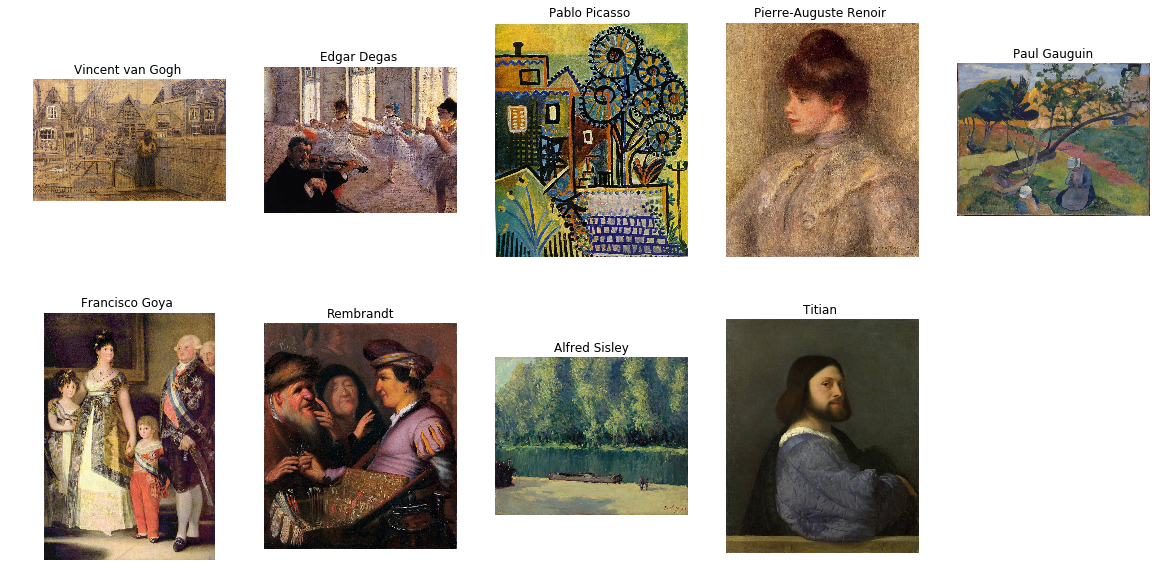

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(20,10))

for path,i in zip(path,range(10)):
    
    image = plt.imread(path)
    image = skimage.color.gray2rgb(image)

    axes[math.floor(i/5)][i%5].imshow(image)
    l=len(path)
    axes[math.floor(i/5)][i%5].set_title(path[-8-(l-23)//2:-7].replace("_"," "))
    
    axes[math.floor(i/5)][i%5].axis("off")
    
axes[-1, -1].axis('off')
    
plt.show()

In [14]:
#Check pixels distribution

x=[]
y=[]

for e in arts:
    high=top_artists_df[top_artists_df["name"]==e]["paintings"].values[0]
        
    for i in range(high): 
        path="images/images/"+str(e).replace(" ","_")+"/"+str(e).replace(" ","_")+"_"+str(i+1)+".jpg"
        image = plt.imread(path)
        x.append(image.shape[0])
        y.append(image.shape[1])
    

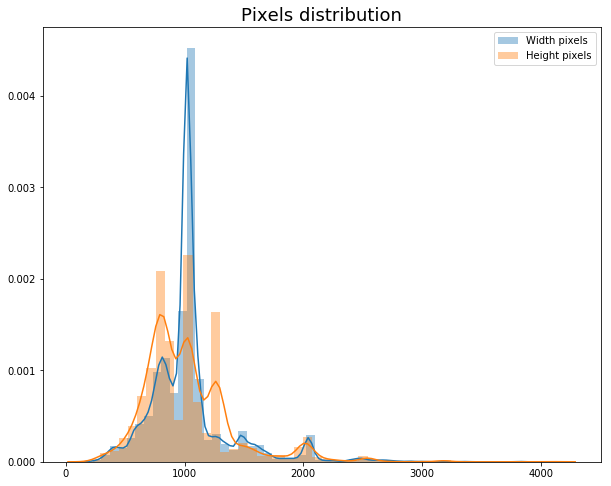

In [15]:
#Plotting pixels distribution

plt.figure(figsize=(10,8))
sns.distplot(x,label="Width pixels")
sns.distplot(y,label="Height pixels")
plt.title("Pixels distribution",size=18)
plt.legend()

In [7]:
artists_array=artists["name"].values
artists_to_del=list(set(artists_array)-set(arts))

In [8]:
#Delete unused artists

for e in artists_to_del:
    if e == "Albrecht Dürer":
        e = "Albrecht_Dürer".replace("_"," ")
        
    shutil.rmtree("images/images/"+e.replace(" ","_"))
    

#Delete resized folders

for e in arts:
    shutil.rmtree("images/images/"+e.replace(" ","_")+"/resized")
     

In [9]:
# Split training and validation set in two separete folders. Within each folder will be each artist subfolders and within them their corresponding
# .jpg files.

pct=0.8

for e in arts:
    os.makedirs("images/images/train/" + e.replace(" ","_"))
    os.makedirs("images/images/test/" + e.replace(" ","_"))
    
    
    input_file="images/images/"+e.replace(" ","_")
    print(input_file)
    for a in list(os.walk(input_file))[0][2]:
        a=a.replace("_"," ")
        
        
        if np.random.rand(1)<pct:
            shutil.copy(input_file+"/"+a.replace(" ","_"), "images/images/train/" +e.replace(" ","_")+"/"+a.replace(" ","_"))
        else:
            shutil.copy(input_file+"/"+a.replace(" ","_"), "images/images/test/" +e.replace(" ","_")+"/"+a.replace(" ","_"))
    
    shutil.rmtree("images/images/"+e.replace(" ","_"))


images/images/Vincent_van_Gogh
images/images/Edgar_Degas
images/images/Pablo_Picasso
images/images/Pierre-Auguste_Renoir
images/images/Paul_Gauguin
images/images/Francisco_Goya
images/images/Rembrandt
images/images/Alfred_Sisley
images/images/Titian


In [19]:
# Building ImageDataGenerator

#Function to convert 1-channel gray to 3-channel RGB
def re_channel(image):
    return skimage.color.gray2rgb(image)


#target_pixels=(128,128,3)
target_pixels=(256,256,3)
batch_size=64

train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range=5,
    #vertical_flip=True,
    preprocessing_function=re_channel)

test_datagen=ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=re_channel)


train_generator = train_datagen.flow_from_directory(
        'images/images/train',
        target_size=target_pixels[0:2],
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        'images/images/test',
        target_size=target_pixels[0:2],
        batch_size=batch_size,
        class_mode='categorical')

step_train = train_generator.n//train_generator.batch_size
step_test = test_generator.n//test_generator.batch_size
print("Total number of batches: ", step_train, "and", step_test)

Found 2975 images belonging to 9 classes.
Found 757 images belonging to 9 classes.
Total number of batches:  46 and 11


(-0.5, 855.5, 1023.5, -0.5)

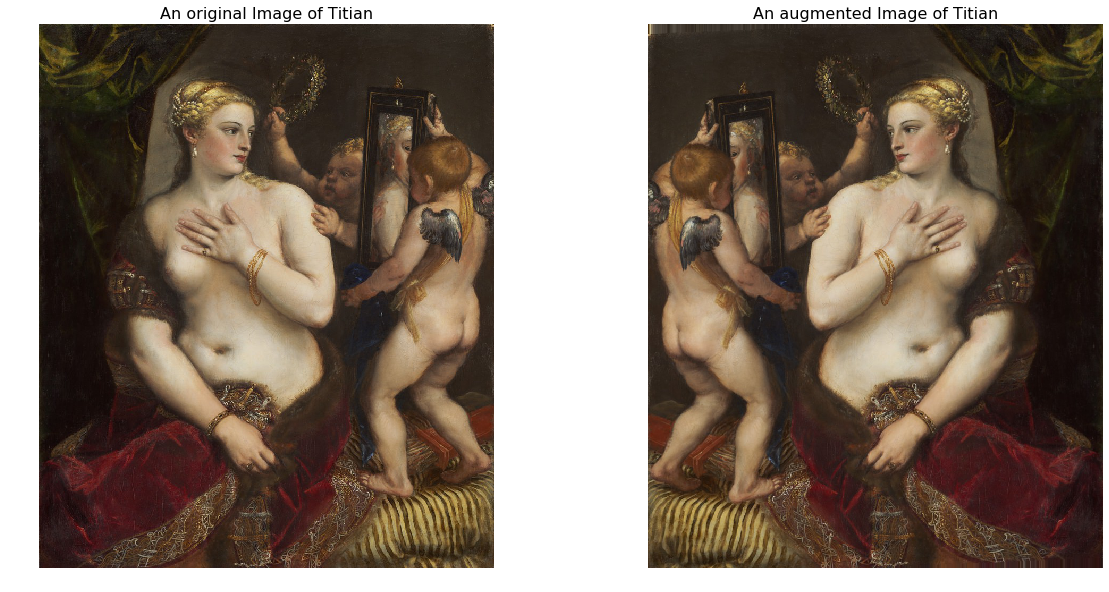

In [20]:
#Show one transformation

rand_artist=np.random.choice(arts)
rand_image=np.random.choice(os.listdir("images/images/train/"+rand_artist.replace(" ","_")))
image = plt.imread("images/images/train/"+rand_artist.replace(" ","_")+"/"+rand_image)

fig, axes = plt.subplots(1, 2, figsize=(20,10))

axes[0].imshow(image)
axes[0].set_title("An original Image of " + rand_artist,size=16)
axes[0].axis('off')

aug_image = train_datagen.random_transform(image)

axes[1].imshow(aug_image)
axes[1].set_title("An augmented Image of " + rand_artist,size=16)
axes[1].axis('off')

### 2. Model Definition and Training

Here we define the three CNN models and train them using a NVIDIA K80 GPU. The first model is custom CNN based on a paper published by the International Journal of Applied Engineering Research which can be found in the following link: https://www.ripublication.com/ijaer17/ijaerv12n4_17.pdf

The other two CNN are trained under the Transfer Learning scheme. We make use of the openly available pre-trained VGG16 and ResNet50 CNNs, remove the output layer and plug in two additional Dense layers and a final output layer. The design of each neural network can be seen below.

In [25]:
# Start with the first custom CNN model

model = Sequential()
#56, 5,5
model.add(Conv2D(128,kernel_size=(7,7),input_shape=(target_pixels),padding="same",activation="relu",strides=3))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
#56, 3,3
model.add(Conv2D(128,kernel_size=(5,5),input_shape=(target_pixels),padding="same",activation="relu",strides=2))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

#model.add(Dropout(0.3))
#128
model.add(Conv2D(256,kernel_size=(3,3),input_shape=(target_pixels),padding="same",activation="relu",strides=1))
model.add(Dropout(0.3))
model.add(Conv2D(256,kernel_size=(3,3),input_shape=(target_pixels),padding="same",activation="relu",strides=1))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))


model.add(Flatten())
#512
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
#256
model.add(Dense(512,activation="relu"))
#model.add(Dropout(0.2))

model.add(Dense(9,activation="softmax"))


optimizer = optimizers.Adam(lr=0.0001)

model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"])


In [26]:
# Training for 50 epochs

n_epoch = 50
history1 = model.fit_generator(generator=train_generator, steps_per_epoch=step_train,
                              validation_data=test_generator, validation_steps=step_test,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              use_multiprocessing=True)
                             

Epoch 1/50
46/46 [==============================] - 81s 2s/step - loss: 1.8208 - acc: 0.3298 - val_loss: 1.5976 - val_acc: 0.4176
Epoch 2/50
46/46 [==============================] - 78s 2s/step - loss: 1.4909 - acc: 0.4789 - val_loss: 2.0698 - val_acc: 0.3463
Epoch 3/50
46/46 [==============================] - 77s 2s/step - loss: 1.3630 - acc: 0.5014 - val_loss: 1.5957 - val_acc: 0.4805
Epoch 4/50
46/46 [==============================] - 77s 2s/step - loss: 1.2793 - acc: 0.5404 - val_loss: 1.4821 - val_acc: 0.5094
Epoch 5/50
46/46 [==============================] - 77s 2s/step - loss: 1.2083 - acc: 0.5694 - val_loss: 1.5523 - val_acc: 0.5094
Epoch 6/50
46/46 [==============================] - 78s 2s/step - loss: 1.1637 - acc: 0.5820 - val_loss: 1.6361 - val_acc: 0.4286
Epoch 7/50
46/46 [==============================] - 76s 2s/step - loss: 1.1170 - acc: 0.6098 - val_loss: 1.5105 - val_acc: 0.4949
Epoch 8/50
46/46 [==============================] - 76s 2s/step - loss: 1.0976 - acc: 0.61

In [ ]:
# Redefine generator for pixels 224x224

target_pixels=(224,224,3)
batch_size=32

train_generator224 = train_datagen.flow_from_directory(
        'images/images/train',
        target_size=target_pixels[0:2],
        batch_size=batch_size,
        class_mode='categorical')

test_generator224 = test_datagen.flow_from_directory(
        'images/images/test',
        target_size=target_pixels[0:2],
        batch_size=batch_size,
        class_mode='categorical')

step_train224 = train_generator224.n//train_generator224.batch_size
step_test224 = test_generator224.n//test_generator224.batch_size
print("Total number of batches: ", step_train224, "and", step_test224)

NameError: name 'train_datagen' is not defined

In [34]:
# Start second model VGG16 for transfer learning.

model2=VGG16(include_top=False, input_shape=target_pixels)

    
X=model2.output
X = Flatten()(X)
X = Dense(512, activation="relu")(X)
X = Dropout(0.4)(X)
#X = BatchNormalization()(X)
#X = Activation('relu')(X)

X=Dense(128,activation="relu")(X)
#X = Dropout(0.5)(X)

output=Dense(9, activation='softmax')(X)
    
model2 = Model(inputs=model2.inputs,outputs=output)    


optimizer=optimizers.Adam(lr=0.0001)

model2.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])
    

58892288/58889256 [==============================] - 1s 0us/step


In [35]:
# Training for 40 epochs

n_epoch = 40
history2 = model2.fit_generator(generator=train_generator224, steps_per_epoch=step_train224,
                              validation_data=test_generator224, validation_steps=step_test224,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              use_multiprocessing=True)
                             

Epoch 1/40
92/92 [==============================] - 84s 909ms/step - loss: 1.9824 - acc: 0.2846 - val_loss: 1.5583 - val_acc: 0.4334
Epoch 2/40
92/92 [==============================] - 82s 888ms/step - loss: 1.5227 - acc: 0.4638 - val_loss: 1.2662 - val_acc: 0.5655
Epoch 3/40
92/92 [==============================] - 82s 888ms/step - loss: 1.2887 - acc: 0.5494 - val_loss: 1.0569 - val_acc: 0.6262
Epoch 4/40
92/92 [==============================] - 82s 887ms/step - loss: 1.2011 - acc: 0.5885 - val_loss: 1.0548 - val_acc: 0.6028
Epoch 5/40
92/92 [==============================] - 82s 888ms/step - loss: 1.0111 - acc: 0.6520 - val_loss: 0.9285 - val_acc: 0.6772
Epoch 6/40
92/92 [==============================] - 82s 888ms/step - loss: 0.9060 - acc: 0.6891 - val_loss: 1.0239 - val_acc: 0.6552
Epoch 7/40
92/92 [==============================] - 82s 889ms/step - loss: 0.7668 - acc: 0.7421 - val_loss: 0.8287 - val_acc: 0.7255
Epoch 8/40
92/92 [==============================] - 82s 891ms/step - 

In [37]:
# Start model 3 ResNet50 for transfer learning.


model3=ResNet50(include_top=False, input_shape=target_pixels)
    
X=model3.output
flat1 = Flatten()(X)


X=Dense(512,activation="relu")(flat1)

#X = BatchNormalization()(X)
#X = Activation('relu')(X)
X = Dropout(0.3)(X)

X=Dense(32,activation="relu")(X)
#X = BatchNormalization()(X)
#X = Activation('relu')(X)

output=Dense(9, activation='softmax')(X)

model3 = Model(inputs=model3.inputs,outputs=output)    


optimizer=optimizers.Adam(lr=0.0001)

model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])
    

94658560/94653016 [==============================] - 16s 0us/step


In [38]:
# Training for 40 epochs

n_epoch = 40
history3 = model3.fit_generator(generator=train_generator224, steps_per_epoch=step_train224,
                              validation_data=test_generator224, validation_steps=step_test224,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              use_multiprocessing=True)
                                

Epoch 1/40
92/92 [==============================] - 101s 1s/step - loss: 1.5176 - acc: 0.5143 - val_loss: 0.9403 - val_acc: 0.7120
Epoch 2/40
92/92 [==============================] - 91s 994ms/step - loss: 0.6022 - acc: 0.8080 - val_loss: 0.6695 - val_acc: 0.8069
Epoch 3/40
92/92 [==============================] - 89s 969ms/step - loss: 0.3111 - acc: 0.9017 - val_loss: 0.8815 - val_acc: 0.7917
Epoch 4/40
92/92 [==============================] - 89s 968ms/step - loss: 0.1976 - acc: 0.9371 - val_loss: 0.6752 - val_acc: 0.8414
Epoch 5/40
92/92 [==============================] - 89s 964ms/step - loss: 0.1613 - acc: 0.9527 - val_loss: 0.7270 - val_acc: 0.8069
Epoch 6/40
92/92 [==============================] - 89s 969ms/step - loss: 0.1063 - acc: 0.9650 - val_loss: 0.8105 - val_acc: 0.7959
Epoch 7/40
92/92 [==============================] - 89s 963ms/step - loss: 0.1139 - acc: 0.9650 - val_loss: 0.6798 - val_acc: 0.8400
Epoch 8/40
92/92 [==============================] - 89s 968ms/step - lo

### 3. Evaluation

Once we've got the models, we evaluate each of them. The metrics applied will be Accuracy, F1 Score, and a multi-class Confusion Matrix in the form of a heatmap. An evaluation report will also be printed with additional metrics such as precision and recall, but we will chose the overall F1 score and Accuracy to determine the best model.

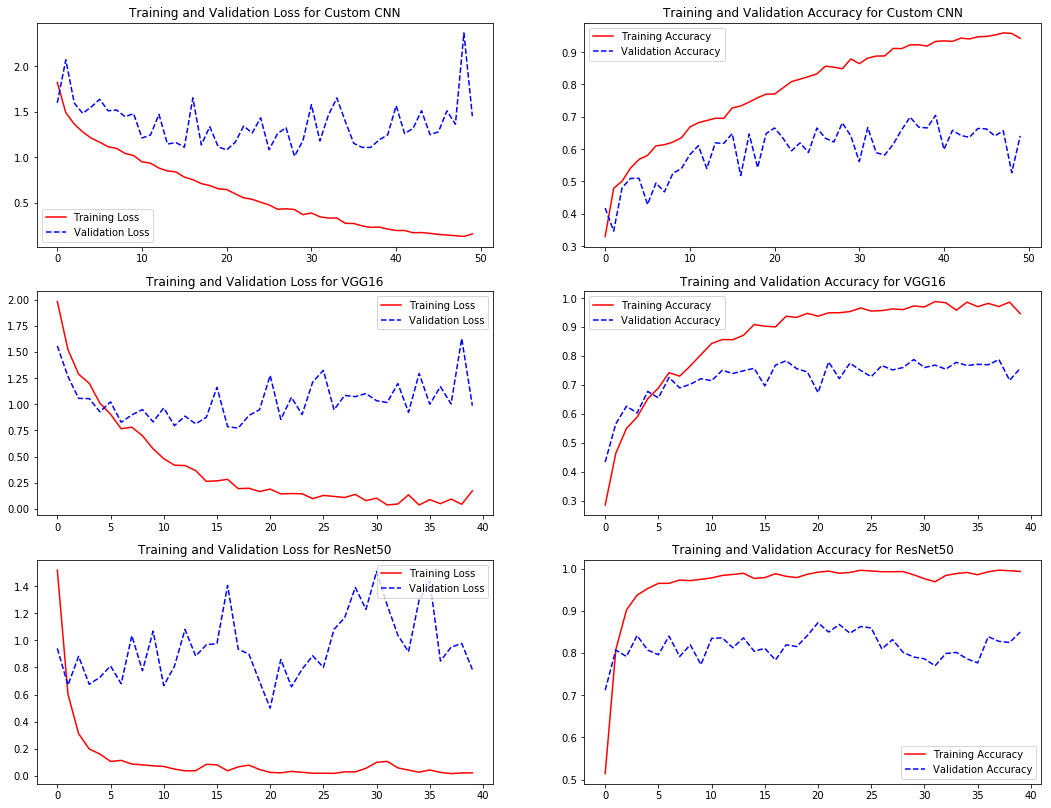

In [49]:
# Plot loss and accuracy evolution

history={}

history["h1_loss"]=history1.history["loss"]
history["h1_vloss"]=history1.history["val_loss"]
history["h1_acc"]=history1.history["acc"]
history["h1_vacc"]=history1.history["val_acc"]

history["h2_loss"]=history2.history["loss"]
history["h2_vloss"]=history2.history["val_loss"]
history["h2_acc"]=history2.history["acc"]
history["h2_vacc"]=history2.history["val_acc"]

history["h3_loss"]=history3.history["loss"]
history["h3_vloss"]=history3.history["val_loss"]
history["h3_acc"]=history3.history["acc"]
history["h3_vacc"]=history3.history["val_acc"]

epochs1=range(len(history["h1_loss"]))
epochs2=range(len(history["h2_loss"]))

fig, axes = plt.subplots(3, 2, figsize=(18,14))

ann=["Custom CNN","VGG16","ResNet50"]
#axes=axes.T.flatten()



for i,nn in enumerate(ann):
    if i == 0:
        epochs=epochs1
    else:
        epochs=epochs2
    axes[i][0].plot(epochs, history["h"+str(i+1)+"_loss"], 'r-', label='Training Loss')
    axes[i][0].plot(epochs, history["h"+str(i+1)+"_vloss"], 'b--', label='Validation Loss')
    axes[i][0].set_title('Training and Validation Loss for '+nn)
    axes[i][0].legend(loc='best')

    axes[i][1].plot(epochs, history["h"+str(i+1)+"_acc"], 'r-', label='Training Accuracy')
    axes[i][1].plot(epochs, history["h"+str(i+1)+"_vacc"], 'b--', label='Validation Accuracy')
    axes[i][1].set_title('Training and Validation Accuracy for '+nn)
    axes[i][1].legend(loc='best')
    

    


In [47]:
#Showing final accuracy metrics

m1acc_train=model.evaluate_generator(train_generator,verbose=1,steps=step_test)
m1acc_test=model.evaluate_generator(test_generator,verbose=1,steps=step_test)
m2acc_train=model2.evaluate_generator(train_generator224,verbose=1,steps=step_test224)
m2acc_test=model2.evaluate_generator(test_generator224,verbose=1,steps=step_test224)
m3acc_train=model3.evaluate_generator(train_generator224,verbose=1,steps=step_test224)
m3acc_test=model3.evaluate_generator(test_generator224,verbose=1,steps=step_test224)
#m4acc_train=model_lr.evaluate_generator(train_generator,verbose=1,steps=step_test)
#m4acc_test=model_lr.evaluate_generator(test_generator,verbose=1,steps=step_test)

23/23 [==============================] - 11s 492ms/step


In [50]:
df={"Metric":["Train Accuracy","Test Accuracy"],"Custom CNN":[m1acc_train[1],m1acc_test[1]],"VGG16":[m2acc_train[1],m2acc_test[1]],
    "ResNet50":[m3acc_train[1],m3acc_test[1]]}#,"Log Reg":[m4acc_train[1],m4acc_test][1]}

df=pd.DataFrame.from_dict(df)
df

,Metric,Custom CNN,VGG16,ResNet50
0,Train Accuracy,0.920455,0.980978,0.995924
1,Test Accuracy,0.639205,0.755435,0.834239


### Metrics Reports

In [51]:
# FUNCTION EXTRACTED FROM KAGGLE.COM

tick_labels = arts

def showClassificationReport_Generator(model, valid_generator, STEP_SIZE_VALID):
    # Loop on each generator batch and predict
    y_pred, y_true = [], []
    for i in range(STEP_SIZE_VALID):
        (X,y) = next(valid_generator)
        y_pred.append(model.predict(X))
        y_true.append(y)
    
    # Create a flat list for y_true and y_pred
    y_pred = [subresult for result in y_pred for subresult in result]
    y_true = [subresult for result in y_true for subresult in result]
    
    # Update Truth vector based on argmax
    y_true = np.argmax(y_true, axis=1)
    y_true = np.asarray(y_true).ravel()
    
    # Update Prediction vector based on argmax
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = np.asarray(y_pred).ravel()
    
    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(10,10))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(9))
    conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False, 
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels,
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    plt.show()
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=np.arange(9), target_names=arts))



### Custom CNN Metrics Reports

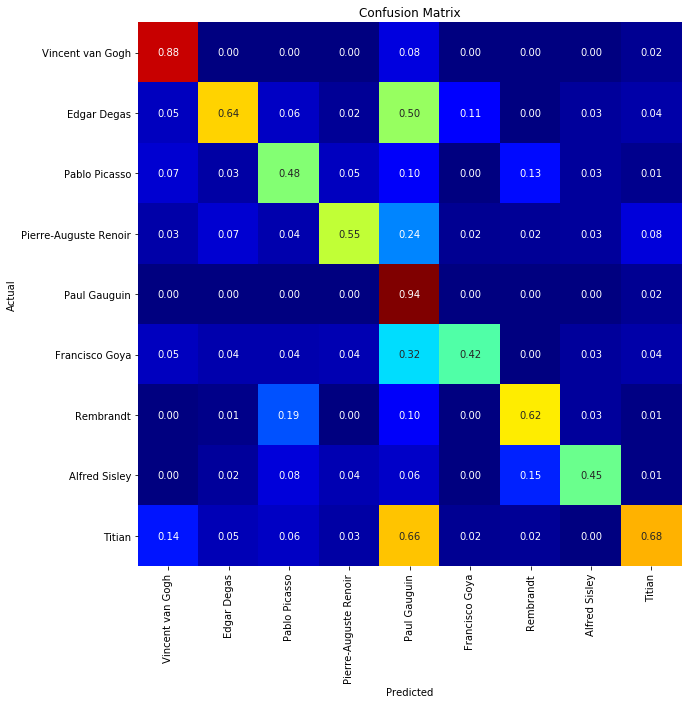

Classification Report:
                       precision    recall  f1-score   support

     Vincent van Gogh       0.72      0.88      0.79        58
          Edgar Degas       0.75      0.64      0.69       132
        Pablo Picasso       0.51      0.48      0.50        52
Pierre-Auguste Renoir       0.74      0.55      0.63        91
         Paul Gauguin       0.31      0.94      0.47        50
       Francisco Goya       0.75      0.42      0.54        64
            Rembrandt       0.66      0.62      0.64        47
        Alfred Sisley       0.78      0.45      0.57        40
               Titian       0.77      0.68      0.72       170

            micro avg       0.63      0.63      0.63       704
            macro avg       0.67      0.63      0.62       704
         weighted avg       0.70      0.63      0.64       704



In [52]:
showClassificationReport_Generator(model,test_generator,step_test)

### VGG16 Metrics Reports

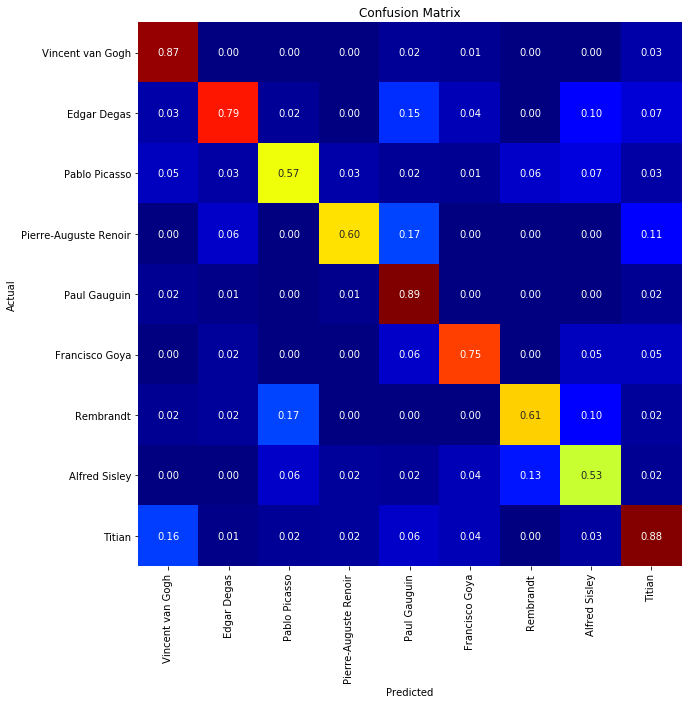

Classification Report:
                       precision    recall  f1-score   support

     Vincent van Gogh       0.76      0.87      0.81        61
          Edgar Degas       0.85      0.79      0.81       140
        Pablo Picasso       0.68      0.57      0.62        53
Pierre-Auguste Renoir       0.87      0.60      0.71        89
         Paul Gauguin       0.64      0.89      0.75        53
       Francisco Goya       0.82      0.75      0.78        67
            Rembrandt       0.77      0.61      0.68        54
        Alfred Sisley       0.60      0.53      0.56        40
               Titian       0.72      0.88      0.79       179

            micro avg       0.75      0.75      0.75       736
            macro avg       0.75      0.72      0.72       736
         weighted avg       0.76      0.75      0.75       736



In [53]:
showClassificationReport_Generator(model2,test_generator224,step_test224)

### ResNet50 Metrics Reports

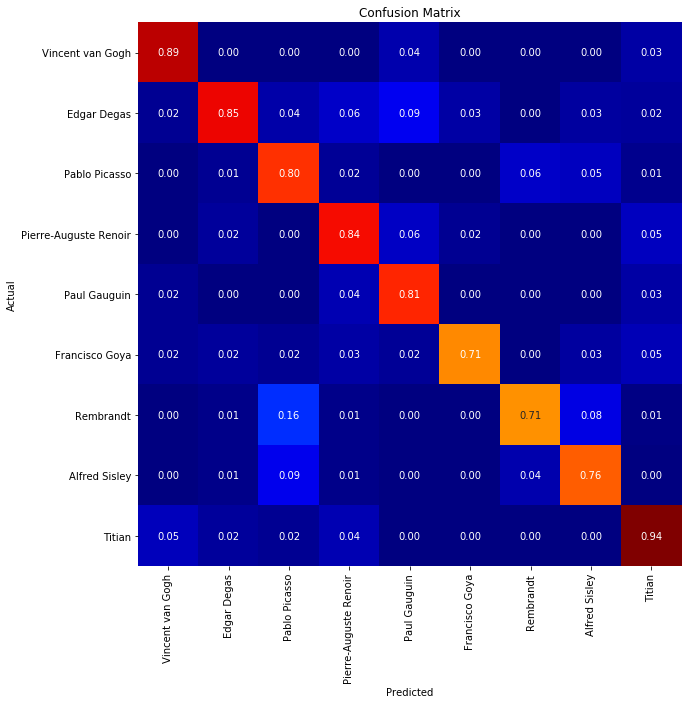

Classification Report:
                       precision    recall  f1-score   support

     Vincent van Gogh       0.90      0.89      0.89        61
          Edgar Degas       0.90      0.85      0.87       136
        Pablo Picasso       0.71      0.80      0.76        56
Pierre-Auguste Renoir       0.80      0.84      0.82        98
         Paul Gauguin       0.80      0.81      0.80        53
       Francisco Goya       0.94      0.71      0.81        63
            Rembrandt       0.88      0.71      0.78        51
        Alfred Sisley       0.80      0.76      0.78        37
               Titian       0.82      0.94      0.88       170

            micro avg       0.84      0.84      0.84       725
            macro avg       0.84      0.81      0.82       725
         weighted avg       0.84      0.84      0.84       725



In [54]:
showClassificationReport_Generator(model3,test_generator224,step_test224)

As we can see, the best model is the ResNet50 transfer learning.

### 4. Deployment

The model will be deployed using Watson Machine Learning. This will make available the model for external scoring.

In [55]:
# Saving models

filename = 'CustomCNN.h5'
model.save(filename)

tar_filename1 = filename + '.tgz'
cmdstring = 'tar -zcvf ' + tar_filename1 + ' ' + filename
os.system(cmdstring)


filename = 'VGG16.h5'
model2.save(filename)

tar_filename2 = filename + '.tgz'
cmdstring = 'tar -zcvf ' + tar_filename2 + ' ' + filename
os.system(cmdstring)


filename = 'ResNet50.h5'
model3.save(filename)

tar_filename3 = filename + '.tgz'
cmdstring = 'tar -zcvf ' + tar_filename3 + ' ' + filename
os.system(cmdstring)



0

In [56]:
#Set WML API and start deployment

wml_credentials={
  "apikey": "8ZJAUzVzgrxn6qdOhyzoQ9YGcN48BLdENS1vimskxD-1",
  "iam_apikey_description": "Auto generated apikey during resource-key operation for Instance - crn:v1:bluemix:public:pm-20:us-south:a/5f4df12e9ebc062849bacd8ba9ee49a6:0d0d0d43-7e2a-4bcd-95ce-223a71601a97::",
  "iam_apikey_name": "auto-generated-apikey-ba1324ce-570d-4636-9470-085296e9bad9",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/5f4df12e9ebc062849bacd8ba9ee49a6::serviceid:ServiceId-6f033807-f166-42f7-83d1-6b23c86b987f",
  "instance_id": "0d0d0d43-7e2a-4bcd-95ce-223a71601a97",
  "url": "https://us-south.ml.cloud.ibm.com"
}

client = WatsonMachineLearningAPIClient(wml_credentials)

In [57]:
model_props1 = {
    client.repository.ModelMetaNames.NAME: 'Custom CNN DeepArt',
    client.repository.ModelMetaNames.FRAMEWORK_NAME: 'tensorflow',
    client.repository.ModelMetaNames.FRAMEWORK_VERSION: '1.13',
    client.repository.ModelMetaNames.RUNTIME_NAME: 'python',
    client.repository.ModelMetaNames.RUNTIME_VERSION: '3.6',
    client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES: [{'name':'keras', 'version': '2.2.4'}]
}


model_props2 = {
    client.repository.ModelMetaNames.NAME: 'VGG16 DeepArt',
    client.repository.ModelMetaNames.FRAMEWORK_NAME: 'tensorflow',
    client.repository.ModelMetaNames.FRAMEWORK_VERSION: '1.13',
    client.repository.ModelMetaNames.RUNTIME_NAME: 'python',
    client.repository.ModelMetaNames.RUNTIME_VERSION: '3.6',
    client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES: [{'name':'keras', 'version': '2.2.4'}]
}


model_props3 = {
    client.repository.ModelMetaNames.NAME: 'ResNet50 DeepArt',
    client.repository.ModelMetaNames.FRAMEWORK_NAME: 'tensorflow',
    client.repository.ModelMetaNames.FRAMEWORK_VERSION: '1.13',
    client.repository.ModelMetaNames.RUNTIME_NAME: 'python',
    client.repository.ModelMetaNames.RUNTIME_VERSION: '3.6',
    client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES: [{'name':'keras', 'version': '2.2.4'}]
}




published_model_details1 = client.repository.store_model(model=tar_filename1, meta_props=model_props1)
published_model_details2 = client.repository.store_model(model=tar_filename2, meta_props=model_props2)
published_model_details3 = client.repository.store_model(model=tar_filename3, meta_props=model_props3)

In [58]:
model_uid1 = client.repository.get_model_uid(published_model_details1)
model_uid2 = client.repository.get_model_uid(published_model_details2)
model_uid3 = client.repository.get_model_uid(published_model_details3)

deployment = client.deployments.create(model_uid1, 'Custom CNN DeepArt')
deployment = client.deployments.create(model_uid2, 'VGG16 DeepArt')
deployment = client.deployments.create(model_uid3, 'ResNet50 DeepArt')




#######################################################################################

Synchronous deployment creation for uid: 'c1a01791-60ff-4a29-9187-cc1f079033ba' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS..
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='b1721522-7d52-44db-b894-20a02fa96d65'
------------------------------------------------------------------------------------------------




#######################################################################################

Synchronous deployment creation for uid: '04235beb-54ac-4491-b775-686e4a57c679' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS.....
DEPLOY_SUCCESS


--------------------------------------------------------------

In [59]:
client.deployments.list()

------------------------------------  ------------------  ------  --------------  ------------------------  ---------------  -------------
GUID                                  NAME                TYPE    STATE           CREATED                   FRAMEWORK        ARTIFACT TYPE
531c0eee-105b-4670-805e-a8f0210aedba  ResNet50 DeepArt    online  DEPLOY_SUCCESS  2020-01-18T00:09:35.919Z  tensorflow-1.13  model
85cfeaa1-f872-42e4-8177-b644bd45748b  VGG16 DeepArt       online  DEPLOY_SUCCESS  2020-01-18T00:08:58.510Z  tensorflow-1.13  model
b1721522-7d52-44db-b894-20a02fa96d65  Custom CNN DeepArt  online  DEPLOY_SUCCESS  2020-01-18T00:08:36.552Z  tensorflow-1.13  model
9bf238d3-71cd-4740-b6b6-b8e79a65ca25  LSTM-deploy-1       online  DEPLOY_SUCCESS  2019-11-19T22:39:11.602Z  tensorflow-1.13  model
------------------------------------  ------------------  ------  --------------  ------------------------  ---------------  -------------


## Conclusion and Discussion

As we can conclude, using transfer learning in pre-trained deep neutal network can improve significantly accuracy in image prediction. Our custom model didn't perform too bad either, noting that in this type of prediction we need to go deep into hidden layers, with enough neurons and filters on each layer to be able to extract the features that describe each painting style to accurately predict the artist.

#### Improvements and Models Analysis

As a room for improvement, the first Custom CNN suffered from light to mild overfitting, this could be improved by adding Dropout layers and/or increasing the dropout rate for the Dense layers and reducing number of epochs to 40. Next two models were trained for 40 epochs, following the results from this first experiment.

VGG16 transfer learning network suffered from light overfitting but had a better convergence than the Custom CNN, eventhough both had similar overfitting issues. Improvement here can be achieved by changing learning rate parameter, adjusting Dropout layers and rates and merging all this within a hyperparameter optimization loop. Due to limited resources this project didn't have in scope hyperparameter optimization.

Finally the ResNet50 transfer learning model outperformed every other model. Right from the 2nd epoch the model showed a higher accuracy on both training and validation sets. Overfitting started appearing after the 25 epochs. Overall performance could be improved with a hyperparameter optimization, introducing Dropout layers and running through different neurons count per layer and restricting number of epochs between 20 and 30.

A Logistic Regression model, using a ANN architecture of an input layer, no hidden layers, and a 9-neurons output layer with L2 normalization was trained and seen to perform poorly, not reaching 39% accuracy in test set.

#### Notes on Models Details

It's important to note that transfer learning models were trained with a 224x224x3 input shape (through the data generator) whilst Custom CNN model was trained with a 256x256x3 shape. This was because of original input shapes for transfer learning models and previous studies for the Custom CNN model. Also, the higher than 512 neurons fully connected outer hidden layers was proved to greatly improve performance, along with the number of neurons obeying a *power-of-2* value rule.

#### Best model was ResNet50 transfer learning model, outperfoming by far the other trained models. No surprise why this model is so renowned across the AI and Deep Learning community. Also thanks to its fast convergence, it could be trained for fewer epochs, thus reducing training time and resources consumption.